<div style="border-radius: 10px; border: #DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size: 100%; text-align: left">
    <h3 align="left"><font color='#3498DB'> 変分推論 </font></h3>
    
    コードは以下より引用しました。
    
    Chris Fonnesbeck , Maxim Kochurov . "Introduction to Variational Inference with PyMC". In: PyMC Examples. Ed. by PyMC Team. DOI: 10.5281/zenodo.5654871
    
    ライセンス情報
    All the notebooks in this example gallery are provided under the MIT License which allows modification, and redistribution for any use provided the copyright and license notices are preserved.

In [9]:
!pip install pymc

In [10]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor
import seaborn as sns

np.random.seed(42)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


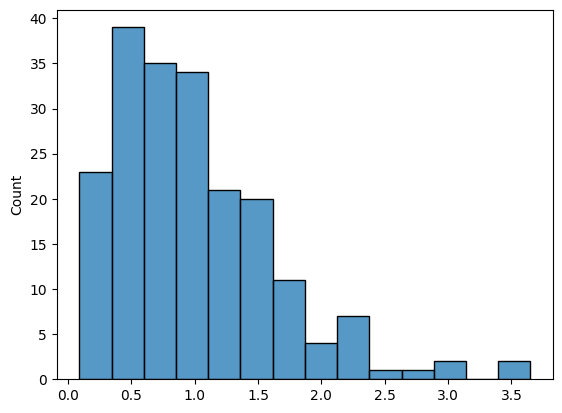

In [11]:
gamma_data = np.random.gamma(2, 0.5, size=200)
sns.histplot(gamma_data);

In [12]:
with pm.Model() as gamma_model:
    alpha = pm.Exponential("alpha", 0.1)
    beta = pm.Exponential("beta", 0.1)
    
    y = pm.Gamma("y", alpha, beta, observed=gamma_data)

In [13]:
with gamma_model:
    mean_field = pm.fit(obj_optimizer=pm.adagrad_window(learning_rate=1e-2))

In [14]:
with gamma_model:
    trace = pm.sample()

In [15]:
mean_field

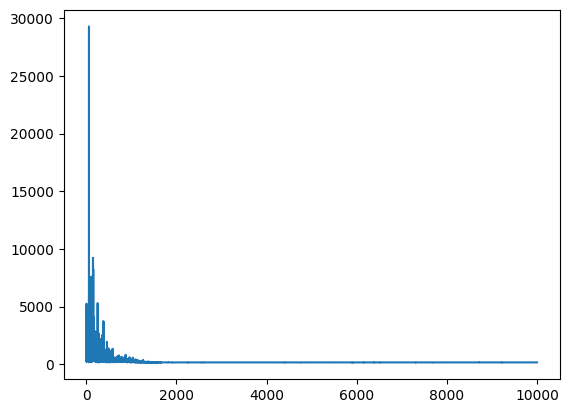

In [16]:
plt.plot(mean_field.hist)

In [17]:
approx_sample = mean_field.sample(1000)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


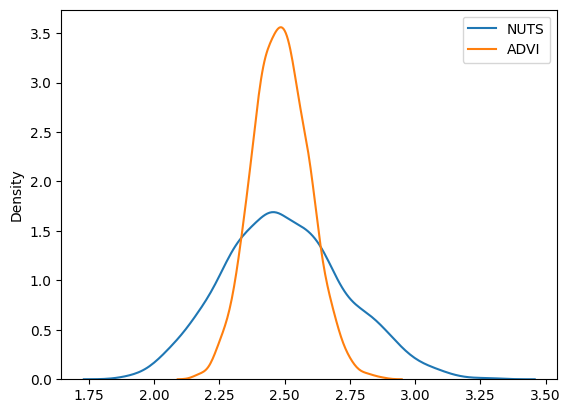

In [18]:
sns.kdeplot(trace.posterior["alpha"].values.flatten(), label="NUTS")
sns.kdeplot(approx_sample.posterior["alpha"].values.flatten(), label="ADVI")
plt.legend();

In [19]:
w = np.array([0.2, 0.8])
mu = np.array([-0.3, 0.5])
sd = np.array([0.1, 0.1])

with pm.Model() as model:
    x = pm.NormalMixture("x", w=w, mu=mu, sigma=sd)
    x2 = x**2
    sin_x = pm.math.sin(x)